# Assignment 5, Question 5: Missing Data Analysis

**Points: 15**

Apply and compare different missing data strategies on the clinical trial dataset.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities from Q3
from q3_data_utils import load_data, clean_data, detect_missing, fill_missing

# Load the data
df = load_data('data/clinical_trial_raw.csv')
print(f"Loaded {len(df)} patients")

# Clean the data
df = clean_data(df)
print(f"After cleaning: {len(df)} patients with {len(df.columns)} variables")

# Prewritten visualization function for missing data
def visualize_missing_data(missing_counts):
    """
    Create a bar chart of missing values by column.
    
    Args:
        missing_counts: pandas Series with missing value counts per column
    """
    plt.figure(figsize=(10, 6))
    missing_counts.plot(kind='bar')
    plt.title('Missing Values by Column')
    plt.xticks(rotation=45)
    plt.ylabel('Number of Missing Values')
    plt.tight_layout()
    plt.show()



Loaded 10000 patients
After cleaning: 10000 patients with 19 variables


## Part 1: Detect Missing Data (3 points)

1. Use the `detect_missing()` utility to find missing values
2. Visualize missing data with a bar plot
3. Calculate the percentage of missing values per column

Missing Values Count:
 patient_id               0
age                    200
sex                      0
bmi                    438
enrollment_date          0
systolic_bp            414
diastolic_bp           414
cholesterol_total      554
cholesterol_hdl        554
cholesterol_ldl        554
glucose_fasting        369
site                     0
intervention_group       0
follow_up_months         0
adverse_events           0
outcome_cvd              0
adherence_pct         1467
dropout                  0
enrollment_date_dt       0
dtype: int64

Missing Values Percentage:
 patient_id             0.00
age                    2.00
sex                    0.00
bmi                    4.38
enrollment_date        0.00
systolic_bp            4.14
diastolic_bp           4.14
cholesterol_total      5.54
cholesterol_hdl        5.54
cholesterol_ldl        5.54
glucose_fasting        3.69
site                   0.00
intervention_group     0.00
follow_up_months       0.00
adverse_events         0.00
ou

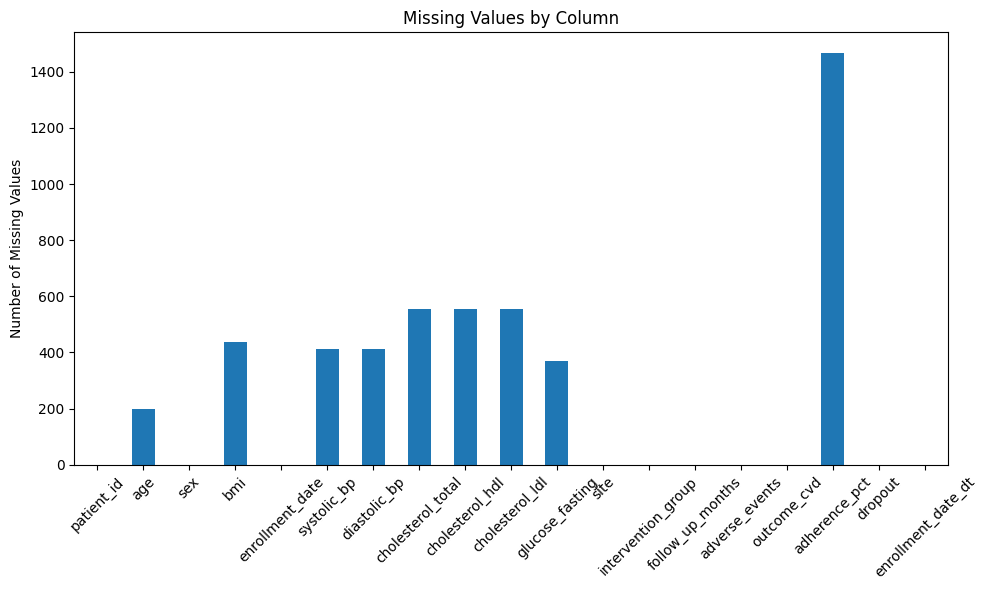

In [2]:

# 1. Use detect_missing(df) to get missing value counts
missing_counts = detect_missing(df)
# 2. Calculate percentage of missing values per column 
missing_percentages = (missing_counts / len(df)) * 100 
# 3. Print both counts and percentages
print("Missing Values Count:\n", missing_counts)
print("\nMissing Values Percentage:\n", missing_percentages)
# 4. Identify which columns have missing data
cols_with_missing = missing_counts[missing_counts > 0].index.tolist()
print("\nColumns with missing data:", cols_with_missing)

# Optional: Use the visualization function above to create a bar chart
visualize_missing_data(missing_counts)


## Part 2: Compare Imputation Strategies (6 points)

For the 'cholesterol_total' column (which has missing values):

1. Fill with mean using `fill_missing()` utility
2. Fill with median using `fill_missing()` utility  
3. Forward fill using pandas `.fillna(method='ffill')`
4. Compare the three strategies - create a summary table showing:
   - Original mean/median
   - Mean/median after each strategy
   - How many values were filled

In [3]:
# Compare imputation strategies for 'cholesterol_total'
orig_missing = int(missing_counts.get('cholesterol_total', 0))
# Original stats
original_mean = df['cholesterol_total'].mean()
original_median = df['cholesterol_total'].median()

# 1) Mean fill
mean_df = df.copy()
mean_df = fill_missing(mean_df, 'cholesterol_total', strategy='mean')
mean_after_mean = mean_df['cholesterol_total'].mean()
mean_after_median = mean_df['cholesterol_total'].median()
mean_filled_count = orig_missing - int(mean_df['cholesterol_total'].isna().sum())

# 2) Median fill
median_df = df.copy()
median_df = fill_missing(median_df, 'cholesterol_total', strategy='median')
median_after_mean = median_df['cholesterol_total'].mean()
median_after_median = median_df['cholesterol_total'].median()
median_filled_count = orig_missing - int(median_df['cholesterol_total'].isna().sum())

# 3) Forward fill (pandas)
ffill_df = df.copy()
ffill_df['cholesterol_total'] = ffill_df['cholesterol_total'].fillna(method='ffill')
ffill_after_mean = ffill_df['cholesterol_total'].mean()
ffill_after_median = ffill_df['cholesterol_total'].median()
ffill_filled_count = orig_missing - int(ffill_df['cholesterol_total'].isna().sum())

# Build summary table
summary = pd.DataFrame({
    'Strategy': ['Original', 'Mean fill', 'Median fill', 'Forward fill'],
    'Mean': [original_mean, mean_after_mean, median_after_mean, ffill_after_mean],
    'Median': [original_median, mean_after_median, median_after_median, ffill_after_median],
    'Values filled': [0, mean_filled_count, median_filled_count, ffill_filled_count]
})

display(summary)

/tmp/ipykernel_16952/46795639.py:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ffill_df['cholesterol_total'] = ffill_df['cholesterol_total'].fillna(method='ffill')


,Strategy,Mean,Median,Values filled
0,Original,178.039488,177.000000,0
1,Mean fill,178.039488,178.039488,554
2,Median fill,177.981900,177.000000,554
3,Forward fill,178.070500,177.000000,554


## Part 3: Dropping Missing Data (3 points)

1. Drop rows where ANY column has missing data - how many rows remain?
2. Drop rows where specific columns have missing data (e.g., only 'age' or 'bmi')
3. Which approach loses less data?

In [4]:
# Drop missing rows with different strategies
# 1) Drop rows where ANY column has missing values
drop_missing_any = df.dropna(how='any')
print(f"Rows after dropping any-missing rows: {len(drop_missing_any)} (shape: {drop_missing_any.shape})")

# 2) Drop rows missing specific important columns (e.g., 'age')
drop_missing_age = df.dropna(subset=['age'])
print(f"Rows after dropping rows with missing 'age': {len(drop_missing_age)} (shape: {drop_missing_age.shape})")

# Show a short sample of dropped vs original counts
print('\nOriginal shape:', df.shape)
print('After drop-any shape:', drop_missing_any.shape)
print('After drop-age shape:', drop_missing_age.shape)

Rows after dropping any-missing rows: 6980 (shape: (6980, 19))
Rows after dropping rows with missing 'age': 9800 (shape: (9800, 19))

Original shape: (10000, 19)
After drop-any shape: (6980, 19)
After drop-age shape: (9800, 19)


## Part 4: Create Clean Dataset (3 points)

Apply your chosen strategy to create a clean dataset:
1. Choose appropriate imputation for numeric columns
2. Drop rows with missing critical values (e.g., patient_id, age)
3. Save to `output/q5_cleaned_data.csv`
4. Save a missing data report to `output/q5_missing_report.txt`

In [5]:
# TODO: Create and save clean dataset
# 1) I chose the mean imputation strategy for 'cholesterol_total' as it maintains the overall mean of the dataset.

final_df = df.copy()

numeric_cols = final_df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    final_df = fill_missing(final_df, col, strategy='mean')

#drop rows with missing 'age' and patient_id as it's important
final_df = final_df.dropna(subset=['age'])
final_df = final_df.dropna(subset=['patient_id'])
# Save the cleaned dataset
final_df.to_csv('output/q5_cleaned_data.csv', index=False)

# Save a missing data report
final_missing_counts = detect_missing(df)
final_missing_counts.to_csv('output/q5_missing_report.csv', header=['missing_count'])


## Reflection

Which imputation strategy would you recommend for this dataset and why?

**Your answer:**

#TODO: Explain your strategy choice
 I chose the mean imputation for the numeric columns because it preserves the original dataset mean.Both the original and the mean_filled dataset had a mean value of 178.03. Filling with mean is the best approximate estimates since it averages the values and returns the mean that could be expected from the dataset. 